La teleportation quantique: Etant donné deux opérateur Alice et Bob. Alice posséde un vecteur d'état $|\psi>$ comment le transmetre à Bob.

* Pour cela on commence par initialiser trois qubit. le qubit  s qui est l'état $|\psi>$ qu'on souhaite envoyer à Bob. le qubit A qui est l'état initiale du qubit de Alice à |0>. et le qubit B qui est l'état initiale du qubit de Bob à |0>.
* Ensuite les états A et B sont intriqué
* Ensuite on applique un opérateur correspond à l'inverse de l'opérateur associé à l'opérateur de creation de l'état de Bell. Ceic pour passer dans la base des état de Bell
* Ensuite on fait une mésure qui permettra de savoir les opération à effectuer sur le qubit de bob c'est-à-dire le qubit B pour que il soit identique à l'état que alice possédait initialement à savoir l'état du qubit S.

In [1]:
#1. preparation de l'état quantique

In [2]:
import pennylane as qml
import numpy as np

In [3]:
def state_preparation(state):
    qml.StatePrep(state , wires = ["S"])

In [4]:
#2. partager l'intrication
def entangle_qubits():
    qml.Hadamard(wires = "A")
    qml.CNOT(wires = ["A" , "B"])

In [5]:
#3. Change of basis
def basis_rotation():
    qml.CNOT(wires = ["S" , "A"])
    qml.Hadamard(wires = "S")

In [6]:
#4. Measurement
def measure_and_update():
    m0 = qml.measure("S")
    m1 = qml.measure("A")
    qml.cond(m1 , qml.PauliX)("B")
    qml.cond(m0 , qml.PauliZ)("B")

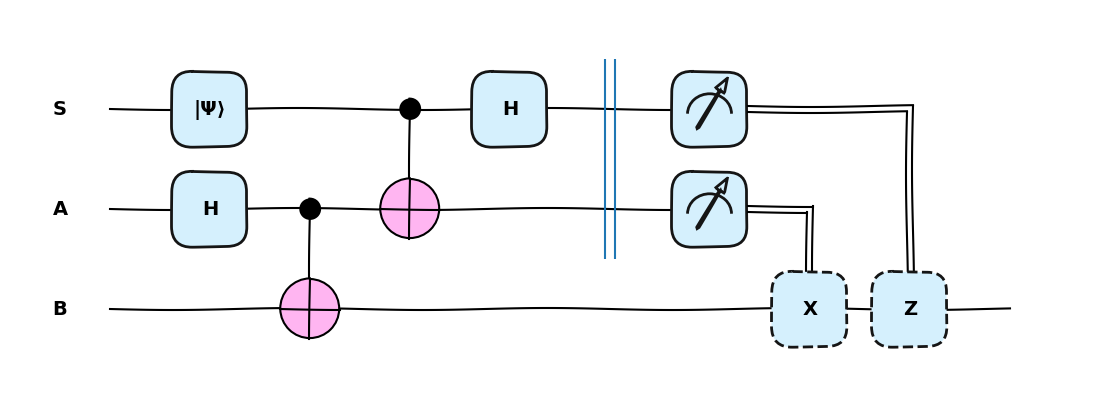

In [7]:
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    qml.Barrier(["S" , "A"] , only_visual = True)
    measure_and_update()
    
    
state = np.array([1/np.sqrt(2) + 0.3j , 0.4 - 0.5j])
_=qml.draw_mpl(teleport , style = "pennylane")(state)

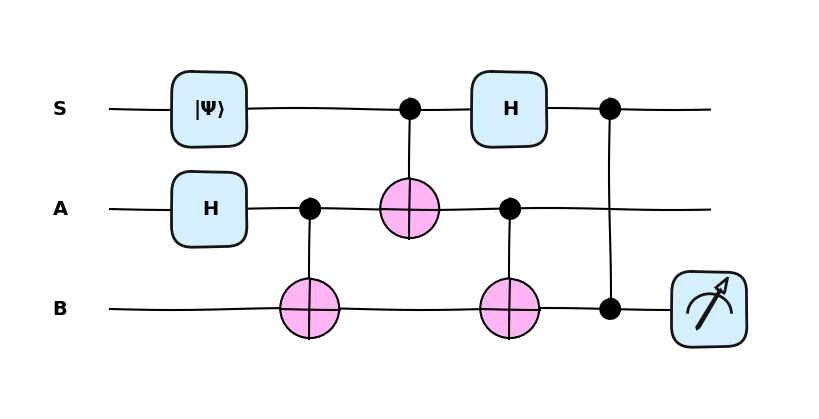

In [8]:
# Deffered measurement: Pour pouvoir effectuer la mésure à la fin du circuit
dev = qml.device("default.qubit" , wires = ["S" , "A" , "B"])

@qml.qnode(dev)
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()
    return qml.density_matrix(wires = ["B"])

_=qml.draw_mpl(teleport , style = "pennylane")(state)

In [9]:
# Verifions que à la fin, l'état du qubit de bob B soit l'état initiale du qubit S

def teleport_state(state):
    teleported_density_matrix = teleport(state)
    original_density_matrix = qml.math.dm_from_state_vector(state)
    
    if not np.allclose(teleported_density_matrix , original_density_matrix):
        raise ValueError(
        f"Alice's state ({state}) not teleported properly."
        f"Final density matrix of Bob's subsystem: {teleported_density_matrix}"
        )
        
    print("State successfully teleported!")
    
teleport_state(state)

State successfully teleported!
